In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import requests
import json
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image, FontManager
import ScraperFC as sfc
Sofascore = sfc.Sofascore()

In [105]:
r = requests.get('https://webws.365scores.com/web/game/?appTypeId=5&langId=29&timezoneName=America/Asuncion&userCountryId=108&gameId=4039624&matchupId=1280-8778-621')

In [106]:
partido = r.json()

In [107]:
partido.keys()

dict_keys(['lastUpdateId', 'requestedUpdateId', 'ttl', 'game', 'sports', 'countries', 'competitions'])

In [108]:
partido_sofascore = Sofascore.get_match_data('https://www.sofascore.com/libertad-cerro-porteno/QucsWuc#11903698')
nombre_local, nombre_visit = Sofascore.get_team_names('https://www.sofascore.com/libertad-cerro-porteno/QucsWuc#11903698')

In [110]:
Sofascore.get_players_match_stats('https://www.sofascore.com/libertad-cerro-porteno/QucsWuc#11903698')

KeyError: 'statistics'

In [18]:
idLocal = partido_sofascore['homeTeam']['id']
idVisit = partido_sofascore['awayTeam']['id']

In [19]:
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idLocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idVisit}/image'))

In [22]:
goles_local = partido_sofascore['homeScore']['normaltime']
goles_visit = partido_sofascore['awayScore']['normaltime']

In [30]:
f'{goles_local} - {goles_visit}'

'1 - 1'

In [20]:
pd.DataFrame(partido['game']['homeCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,48%,0.48,True
1,3,Total Remates,2,Ataque,False,13,0.62,False
2,4,Remates a Puerta,2,Ataque,True,5,0.56,False
3,5,Remates Fuera,2,Ataque,False,8,0.67,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,63,0.50,False
5,8,Saques de Esquina,2,Ataque,True,6,0.60,False
6,9,Fueras de Juego,2,Ataque,True,1,0.25,False
7,13,Saques de falta,2,Ataque,False,12,0.50,False
8,21,Total de pases,2,Ataque,False,0,0.00,False
9,19,Pases completados,2,Ataque,False,0,0.00,False


In [21]:
pd.DataFrame(partido['game']['awayCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,52%,0.52,True
1,3,Total Remates,2,Ataque,False,8,0.38,False
2,4,Remates a Puerta,2,Ataque,True,4,0.44,False
3,5,Remates Fuera,2,Ataque,False,4,0.33,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,64,0.50,False
5,8,Saques de Esquina,2,Ataque,True,4,0.40,False
6,9,Fueras de Juego,2,Ataque,True,3,0.75,False
7,13,Saques de falta,2,Ataque,False,12,0.50,False
8,21,Total de pases,2,Ataque,False,0,0.00,False
9,19,Pases completados,2,Ataque,False,0,0.00,False


In [34]:
def sacar_spines(ax):
    ax.spines[['top','right','bottom','left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [60]:
torneo = partido_sofascore['tournament']['uniqueTournament']['name']
fecha = partido_sofascore['roundInfo']['round']

In [37]:
partido_sofascore

{'tournament': {'name': 'Division de Honor, Apertura',
  'slug': 'division-de-honor-apertura',
  'category': {'name': 'Paraguay',
   'slug': 'paraguay',
   'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
   'id': 280,
   'country': {'alpha2': 'PY', 'name': 'Paraguay'},
   'flag': 'paraguay',
   'alpha2': 'PY'},
  'uniqueTournament': {'name': 'Primera Division, Apertura',
   'slug': 'primera-division-apertura',
   'primaryColorHex': '#003e80',
   'secondaryColorHex': '#c20c0d',
   'category': {'name': 'Paraguay',
    'slug': 'paraguay',
    'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
    'id': 280,
    'country': {'alpha2': 'PY', 'name': 'Paraguay'},
    'flag': 'paraguay',
    'alpha2': 'PY'},
   'userCount': 8712,
   'id': 11540,
   'country': {},
   'hasEventPlayerStatistics': False,
   'crowdsourcingEnabled': False,
   'hasPerformanceGraphFeature': False,
   'displayInverseHomeAwayTeams': False},
  'priority': 0,
  'competitionType': 1,
  'id': 3133},
 's

In [90]:
fuente1 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-Regular.ttf?raw=true')
fuente2 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-BoldItalic.ttf?raw=true')
fuente3 = FontManager('https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-BoldItalic.ttf?raw=true')

"ax13 = fig.add_subplot(gs[3:,2:4])\nax13.set_title('[3:,2:4]')"

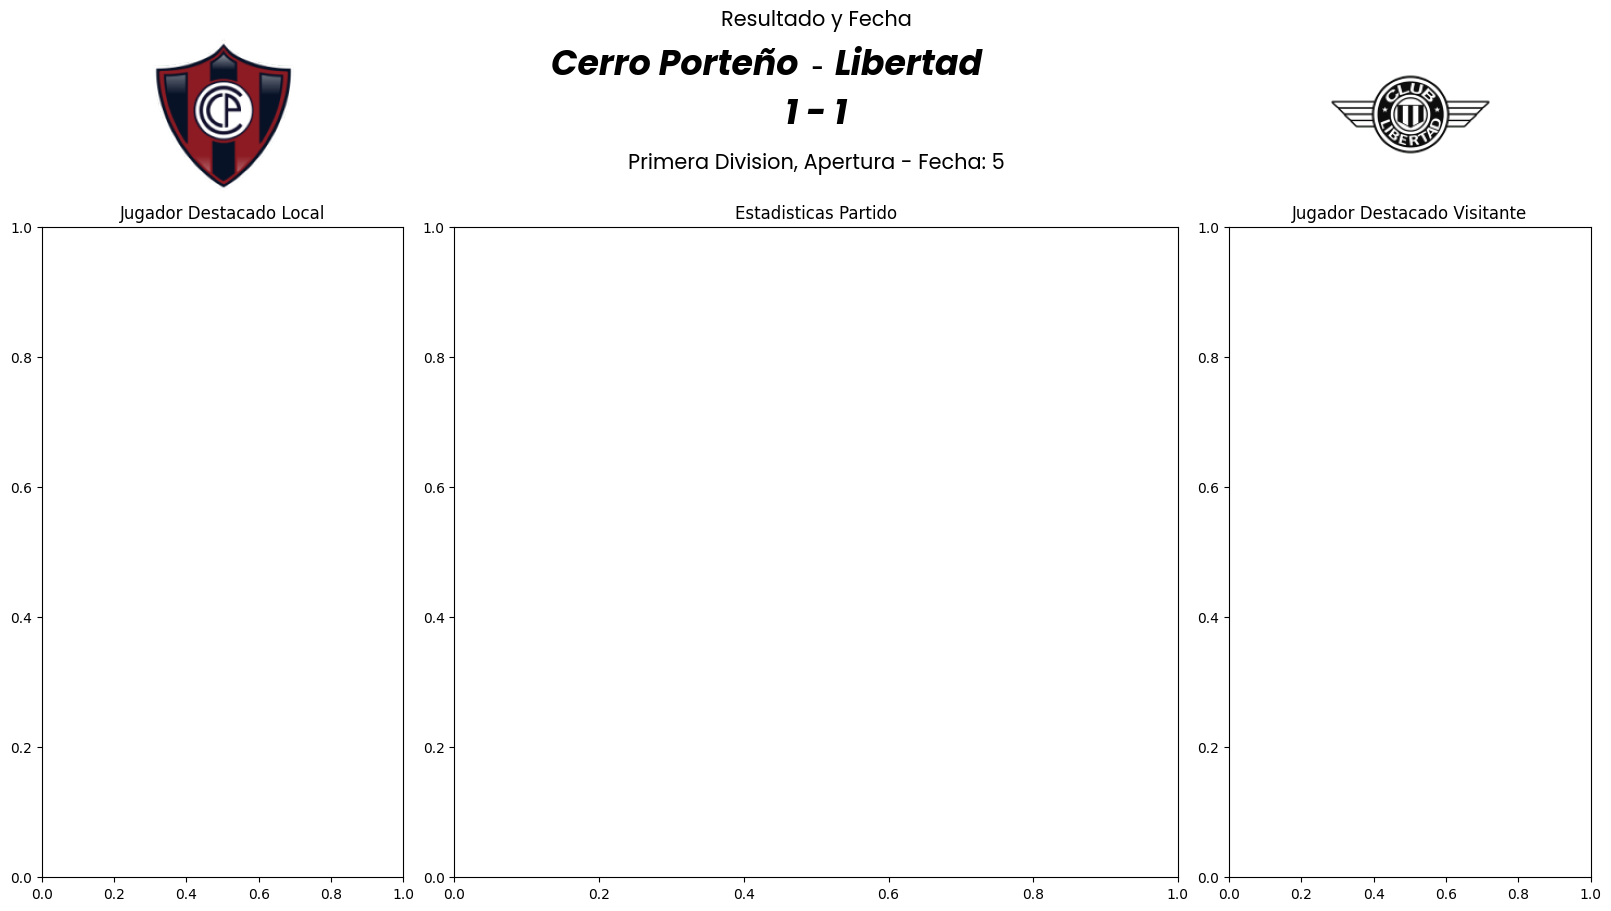

In [95]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

#Escudo Local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.set_title('')
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo Visitante
ax2 = fig.add_subplot(gs[0,3:4])
#ax2.set_title('[0,:2]')
ax2.imshow(imagen2)
sacar_spines(ax2)


ax3 = fig.add_subplot(gs[0,1:3])
ax3.set_title('Resultado y Fecha', fontproperties=fuente1.prop, size = 15)
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.5,.8,'-', size = 25, ha='center', va='center')
ax3.text(.5,.5,f'{goles_local} - {goles_visit}', ha='center', va='center', fontproperties=fuente2.prop, size = 25)
ax3.text(.5,.2,f'{torneo} - Fecha: {fecha}', ha='center', va='center', fontproperties=fuente1.prop, size = 15)
sacar_spines(ax3)

 
"""ax3 = fig.add_subplot(gs[0,3:4])
ax3.set_title('[0,3:4]')

ax4 = fig.add_subplot(gs[0,4:5])
ax4.set_title('[0,4:5]')"""

"""ax5 = fig.add_subplot(gs[0,5:])
ax5.set_title('[0,5:]')"""

ax6 = fig.add_subplot(gs[1:,:1])
ax6.set_title('Jugador Destacado Local')

ax7 = fig.add_subplot(gs[1:,1:3])
ax7.set_title('Estadisticas Partido')

ax8 = fig.add_subplot(gs[1:,3:])
ax8.set_title('Jugador Destacado Visitante')

"""ax8 = fig.add_subplot(gs[1:3,5:])
ax8.set_title('[1:3,5:]')"""

"""ax9 = fig.add_subplot(gs[4:,0:2])
ax9.set_title('[4:,0:2]')"""

"""ax10 = fig.add_subplot(gs[4:,5:])
ax10.set_title('[4:,5:]')"""

"""ax11 = fig.add_subplot(gs[3:4,0:2])
ax11.set_title('[3:4,0:2]')"""

"""ax12 = fig.add_subplot(gs[3:4,5:])
ax12.set_title('[3:4,5:]')"""

"""ax13 = fig.add_subplot(gs[3:,2:4])
ax13.set_title('[3:,2:4]')"""